In [254]:
# Getting the data
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# Call the API
payload = {"code": "US"}  # or {'country': 'Germany'}
# To retrieve data for all countries use {'code': 'ALL'}
URL = "https://api.statworx.com/covid"
response = requests.post(url=URL, data=json.dumps(payload))

# Convert to data frame
df = pd.DataFrame.from_dict(json.loads(response.text))

In [255]:
df.head()

,date,day,month,year,cases,deaths,country,code,population,cases_cum,deaths_cum
0,2019-12-31,31,12,2019,0,0,United_States_of_America,US,327167434,0,0
1,2020-01-01,1,1,2020,0,0,United_States_of_America,US,327167434,0,0
2,2020-01-02,2,1,2020,0,0,United_States_of_America,US,327167434,0,0
3,2020-01-03,3,1,2020,0,0,United_States_of_America,US,327167434,0,0
4,2020-01-04,4,1,2020,0,0,United_States_of_America,US,327167434,0,0


In [233]:
# Let's make a cool plot
# We will get data for 'all' countries
payload = {"code": "ALL"}
URL = "https://api.statworx.com/covid"
response = requests.post(url=URL, data=json.dumps(payload))

# Convert the response to a data frame
df = pd.DataFrame.from_dict(json.loads(response.text))

In [248]:
# Convert date column to date format
df.loc[:, "date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

# Filter specific countries
# The following countries will be included
list_of_countries = ["Germany", "Switzerland", "France", "Spain", "Canada"]
dff = df[df["country"].isin(list_of_countries)]

# Filter the data to a specific timeframe
date_start = "2020-01-15"
date_today = df[df["date"] == df["date"].max()]["date"].iloc[0]
dff = dff[dff["date"] > date_start]

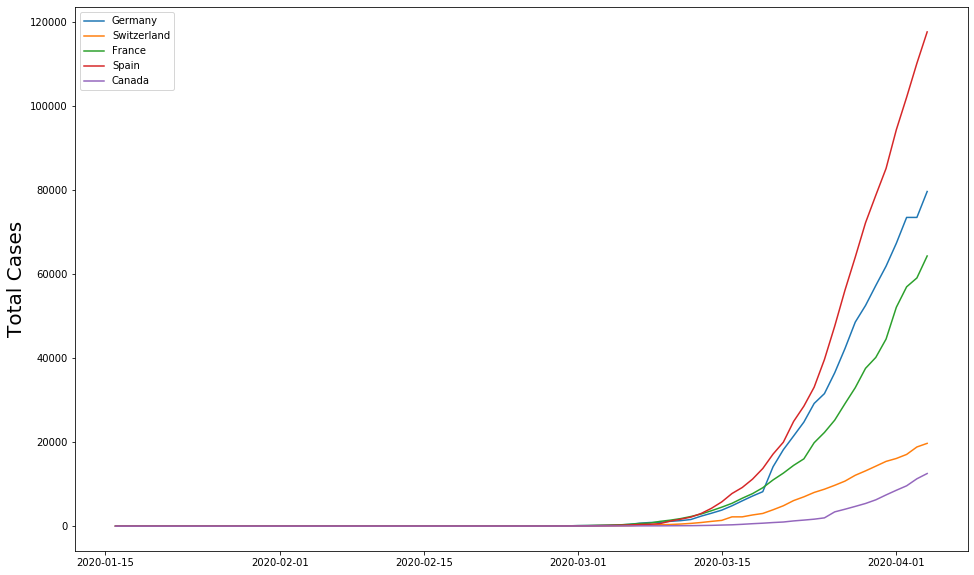

In [251]:
# Print the plot
x = dff[dff["country"] == list_of_countries[1]]["date"]
fig, ax1 = plt.subplots(figsize=(16, 10))
plt.ylabel("Total Cases", fontsize=20, color="black")
for countryname in list_of_countries:
    countrydata = dff[dff["country"] == countryname]["cases_cum"]
    plt.plot(x, countrydata, label=countryname)

plt.legend(list_of_countries, loc="upper left")
plt.show()

In [3]:
# Making an API Call using Pandas Webreader
# Remote data access for pandas
import pandas_datareader as webreader

from datetime import date

date_today = "2020-01-01"
date_start = "2010-01-01"

# Get S&P500 quote
symbol = "DAX"

df = webreader.DataReader(symbol, start=date_start, end=date_today, data_source="yahoo")
df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-23,25.270000,25.090000,25.090000,25.250000,7400.0,22.707819
2014-10-24,25.190001,25.139999,25.139999,25.190001,15200.0,22.653858
2014-10-27,25.028000,25.028000,25.028000,25.028000,300.0,22.508169
2014-10-28,25.510000,25.440001,25.440001,25.510000,3800.0,22.941643
2014-10-29,25.670000,25.660000,25.660000,25.670000,13600.0,23.085535


In [6]:
# Save the file as csv
df.to_csv("youfilename.csv", index=False)